In [6]:
import pandas as pd

# Load the dataset
file_path = 'Netflix_Subscriptions.csv'
data = pd.read_csv(file_path)

# Display the first few rows to understand the structure of the dataset
data.head(), data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Time Period  42 non-null     object
 1   Subscribers  42 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 800.0+ bytes


(  Time Period  Subscribers
 0  01/04/2013     34240000
 1  01/07/2013     35640000
 2  01/10/2013     38010000
 3  01/01/2014     41430000
 4  01/04/2014     46130000,
 None)

In [7]:
# Convert 'Time Period' to datetime and set it as the index
data['Time Period'] = pd.to_datetime(data['Time Period'], format='%d/%m/%Y')
data.set_index('Time Period', inplace=True)

# Display the updated dataframe structure
data.head(), data.index


(             Subscribers
 Time Period             
 2013-04-01      34240000
 2013-07-01      35640000
 2013-10-01      38010000
 2014-01-01      41430000
 2014-04-01      46130000,
 DatetimeIndex(['2013-04-01', '2013-07-01', '2013-10-01', '2014-01-01',
                '2014-04-01', '2014-07-01', '2014-10-01', '2015-01-01',
                '2015-04-01', '2015-07-01', '2015-10-01', '2016-01-01',
                '2016-04-01', '2016-07-01', '2016-10-01', '2017-01-01',
                '2017-04-01', '2017-07-01', '2017-10-01', '2018-01-01',
                '2018-04-01', '2018-07-01', '2018-10-01', '2019-01-01',
                '2019-04-01', '2019-07-01', '2019-10-01', '2020-01-01',
                '2020-04-01', '2020-07-01', '2020-10-01', '2021-01-01',
                '2021-04-01', '2021-07-01', '2021-10-01', '2022-01-01',
                '2022-04-01', '2022-07-01', '2022-10-01', '2023-01-01',
                '2023-04-01', '2023-07-01'],
               dtype='datetime64[ns]', name='Time Pe

In [8]:
# Importing Necessay Python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_white"
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

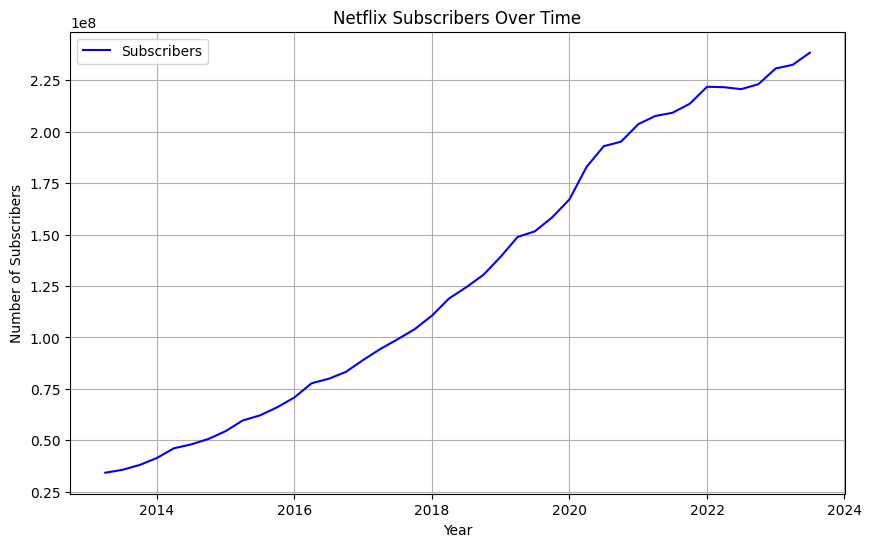

In [10]:

# Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Subscribers'], label='Subscribers', color='blue')
plt.title('Netflix Subscribers Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Subscribers')
plt.grid(True)
plt.legend()
plt.show()



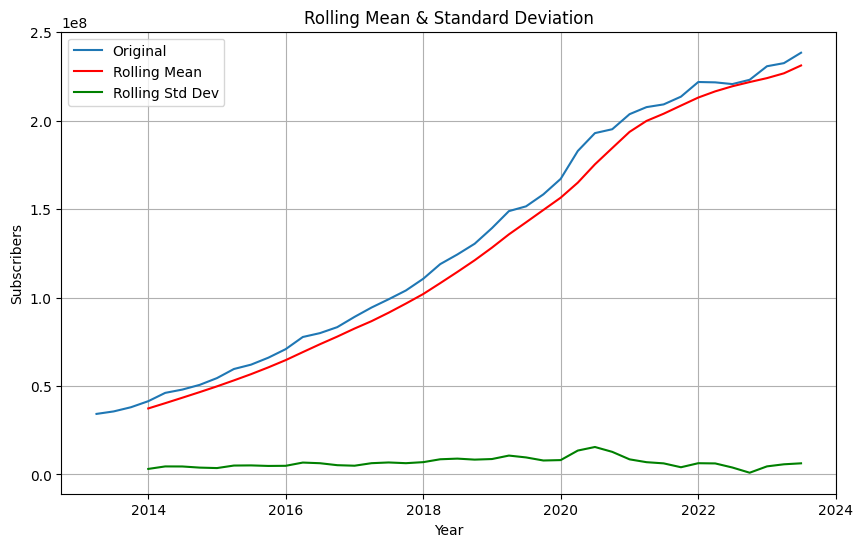

In [11]:
# Calculate rolling statistics
rolling_mean = data['Subscribers'].rolling(window=4).mean()
rolling_std = data['Subscribers'].rolling(window=4).std()

# Plot rolling statistics
plt.figure(figsize=(10, 6))
plt.plot(data['Subscribers'], label='Original')
plt.plot(rolling_mean, label='Rolling Mean', color='red')
plt.plot(rolling_std, label='Rolling Std Dev', color='green')
plt.title('Rolling Mean & Standard Deviation')
plt.xlabel('Year')
plt.ylabel('Subscribers')
plt.legend()
plt.grid(True)
plt.show()


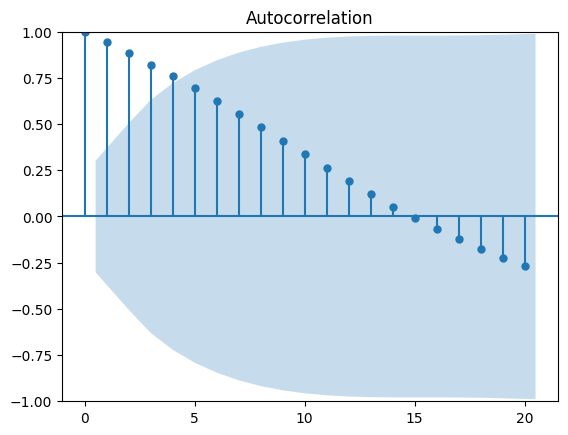

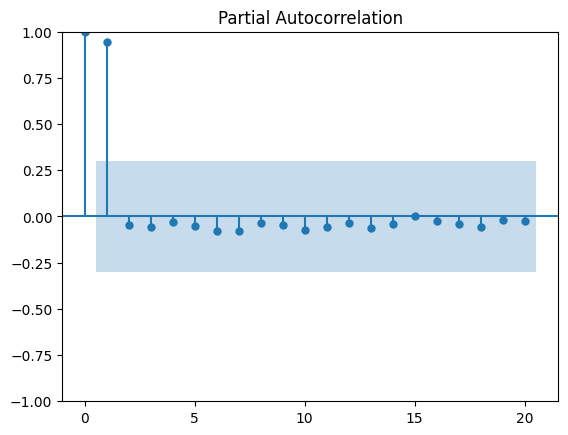

In [13]:


# ACF plot
plot_acf(data['Subscribers'], lags=20)
plt.show()

# PACF plot
plot_pacf(data['Subscribers'], lags=20)
plt.show()


In [16]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model
p,d,q = 1,1,1
model = ARIMA(data['Subscribers'], order=(p,d,q))  # Replace p, d, q with your model parameters
results = model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:            Subscribers   No. Observations:                   42
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -672.993
Date:                Wed, 02 Oct 2024   AIC                           1351.986
Time:                        20:11:14   BIC                           1357.127
Sample:                    04-01-2013   HQIC                          1353.858
                         - 07-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9997      0.012     80.769      0.000       0.975       1.024
ma.L1         -0.9908      0.221     -4.476      0.000      -1.425      -0.557
sigma2      1.187e+13   1.57e-14   7.57e+26      0.0

c:\Users\hp\.pyenv\pyenv-win\versions\3.10.0\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency QS-OCT will be used.

c:\Users\hp\.pyenv\pyenv-win\versions\3.10.0\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency QS-OCT will be used.

c:\Users\hp\.pyenv\pyenv-win\versions\3.10.0\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency QS-OCT will be used.



In [17]:
# Define how many steps to predict into the future
future_steps = 5  # Number of future periods to forecast

# Make predictions
predictions = results.predict(len(data), len(data) + future_steps - 1)

# Convert predictions to integers if required
predictions = predictions.astype(int)

# Print the predictions
print(predictions)


2023-10-01    243321465
2024-01-01    248251663
2024-04-01    253180592
2024-07-01    258108254
2024-10-01    263034649
Freq: QS-OCT, Name: predicted_mean, dtype: int32


c:\Users\hp\.pyenv\pyenv-win\versions\3.10.0\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency QS-OCT will be used.

c:\Users\hp\.pyenv\pyenv-win\versions\3.10.0\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency QS-OCT will be used.

c:\Users\hp\.pyenv\pyenv-win\versions\3.10.0\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency QS-OCT will be used.



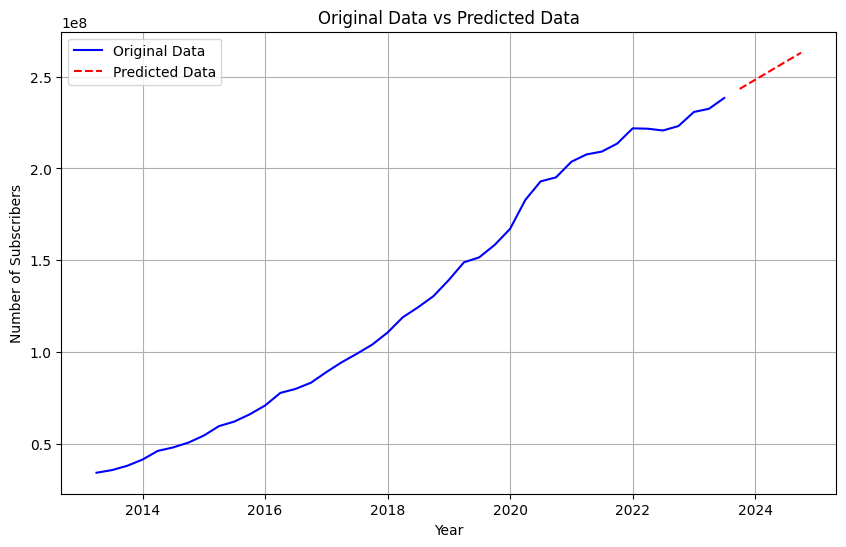

In [18]:
# Fit the ARIMA model with (1, 1, 1)
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model
model = ARIMA(data['Subscribers'], order=(1, 1, 1))
results = model.fit()

# Define how many steps into the future to predict
future_steps = 5

# Generate predictions
predictions = results.predict(len(data), len(data) + future_steps - 1)

# Create a new index for future dates
last_date = data.index[-1]
future_dates = pd.date_range(last_date, periods=future_steps + 1, freq='QS')[1:]

# Plot the original data and predicted data
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Subscribers'], label='Original Data', color='blue')
plt.plot(future_dates, predictions, label='Predicted Data', color='red', linestyle='--')

# Add labels and title
plt.title('Original Data vs Predicted Data')
plt.xlabel('Year')
plt.ylabel('Number of Subscribers')
plt.grid(True)
plt.legend()
plt.show()


# SUMMARY

Using techniques like time series forecasting, Netflix can estimate the expected number of new subscribers in a given time period and better understand the growth potential of their business. It enhances operational efficiency, financial planning, and content strategy, ultimately contributing to their success and growth in the highly competitive streaming industry. I hope you liked this article on Netflix Subscriptions Forecasting using Python. Feel free to ask valuable questions in the comments section below.